# Junyi
[data source](https://pslcdatashop.web.cmu.edu/Files?datasetId=1198)

### Authorization
	Any form of commercial usage is not allowed!
	Please cite the following paper if you publish your work:

	Haw-Shiuan Chang, Hwai-Jung Hsu and Kuan-Ta Chen,
	"Modeling Exercise Relationships in E-Learning: A Unified Approach,"
	International Conference on Educational Data Mining (EDM), 2015.

### Introduction
The dataset contains the problem log and exercise-related information on the Junyi Academy ( http://www.junyiacademy.org/ ), an E-learning platform established in 2012 on the basis of the open-source code released by Khan Academy. In addition, the annotations of exercise relationship we collected for building models are also available. 


## Data Description
### Column Description
#### junyi_Exercise_table.csv:
Field | Annotation
------ | ----
name   | Exercise name (The name is also an id of exercise, so each name is unique in the dataset). If you want to access the exercise on the website, please append this name after url, http://www.junyiacademy.org/exercise/ (e.g., http://www.junyiacademy.org/exercise/similar_triangles_1 ). Please note that Junyi Academy are constantly changing their contents as Khan Academy did, so some url of exercises might be unavaible when you access them.
live   |Whether the exercise is still accessible on the website on Jan. 2015
prerequisite|	Indicate its prerequisite exericse (parent shown in its knowledge map)
h_position|	The coordiate on the x axis of the knowledge map
v_position|	The coordiate on the y axis of the knowledge map
creation_date|	The date this exercise is created
seconds_per_fast_problem|	The website judge a student finish the exercise fast if he/she takes less then this time to answer the question. The number is manually assigned by the experts in Junyi Academy.
pretty_display_name|	The chinese name of exercise shown in the knowledge map (Please use UTF-8 to decode the chinese characters)
short_display_name|	Another chinese name of exercise (Please use UTF-8 to decode the chinese characters)
topic|	The topic of each exercise, and the topic would be shown as a larger node in the knowledge map.
area:| The area of each exercise (Each area contains several topics)

In [1]:
import numpy as np
import dask.dataframe as dd
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go


In [2]:
path = "./junyi/junyi_Exercise_table.csv"

data = pd.read_csv(path, encoding = "utf-8",low_memory=False)
data.head()

,name,live,prerequisites,h_position,v_position,creation_date,seconds_per_fast_problem,pretty_display_name,short_display_name,topic,area
0,parabola_intuition_1,True,recognizing_conic_sections,47,2,2012-10-11 17:55:24.8056 UTC,13.0,?物線直覺 1,?物線直覺1,conic-sections,algebra
1,circles_and_arcs,True,NaN,40,-20,2012-10-11 17:55:33.41014 UTC,27.0,圓與弧,圓與弧,area-perimeter-and-volume,geometry
2,inscribed_angles_3,True,inscribed_angles_2,44,-22,2012-10-11 17:55:44.11836 UTC,5.0,圓周角與圓心角換算 3,圓周角與圓心角換算3,circle-properties,geometry
3,solving_quadratics_by_factoring,True,factoring_polynomials_1,50,-2,2012-10-11 17:54:59.28029 UTC,7.0,因式分解法,因式分解法,quadtratics,algebra
4,graphing_parabolas_1,True,graphing_parabolas_0.5,52,0,2012-10-11 17:55:00.48268 UTC,24.0,畫拋物線 1,畫拋物線1,quadtratics,algebra


In [3]:
data.describe()

,h_position,v_position,seconds_per_fast_problem
count,837.000000,837.000000,837.000000
mean,25.402628,-5.704898,10.782557
std,15.876667,12.721159,8.935352
min,-15.000000,-34.000000,0.000000
25%,15.000000,-17.000000,5.000000
50%,26.000000,-5.000000,8.000000
75%,36.000000,5.000000,13.000000
max,60.000000,19.000000,60.000000


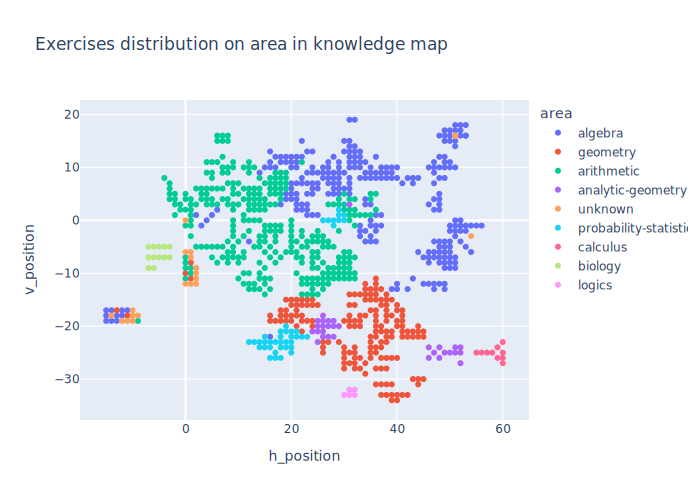

In [4]:
data["area"] = [item if item != "null" and item !='nan' else "unknown" 
                            for item in data["area"].apply(str)]

fig = px.scatter(
    data,
    x = 'h_position',
    y = 'v_position',
    color='area',
    title='Exercises distribution on area in knowledge map'
)

fig.show('svg')

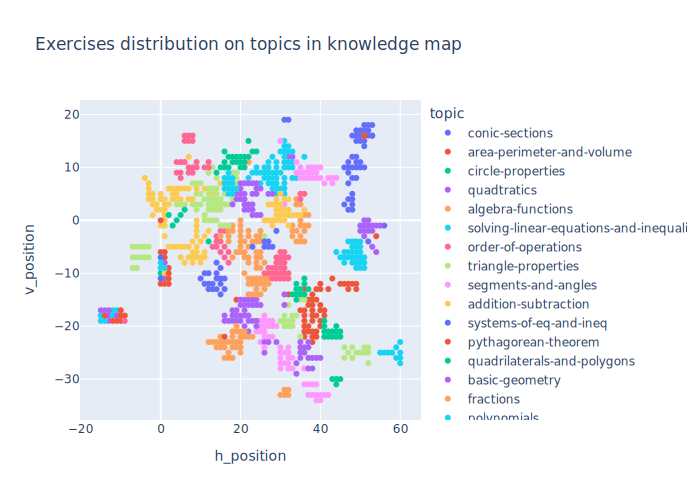

In [5]:
data["topic"] = [item if item != "null" and item !='nan' else "unknown" 
                            for item in data["topic"].apply(str)]

fig = px.scatter(
    data,
    x = 'h_position',
    y = 'v_position',
    color='topic',
    title='Exercises distribution on topics in knowledge map'
)

fig.show('svg')

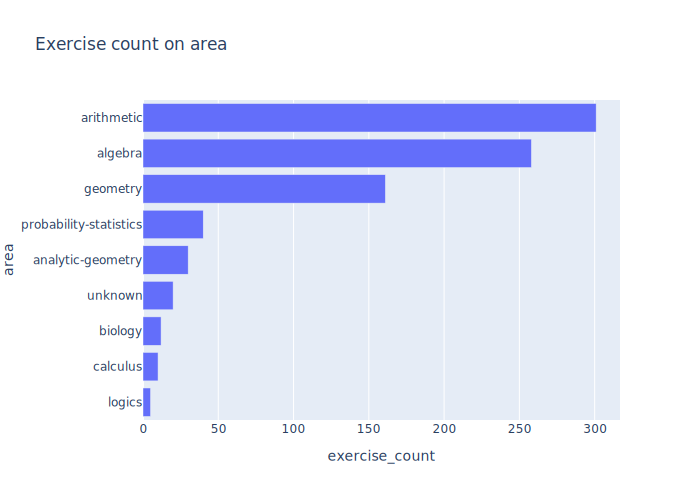

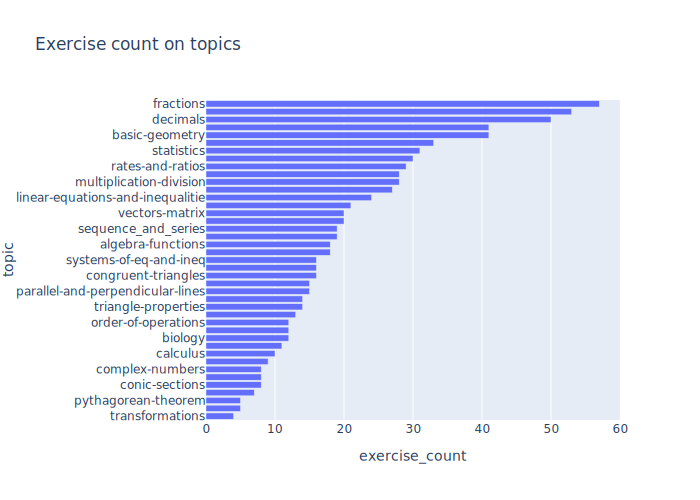

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating two subplots
def makeplot(title='Average time And Exercises count spent on area',groupByItem='area'):
    ds=data.groupby(groupByItem,as_index=False).agg(exercise_count=('topic','count'))

    ds = ds.sort_values('exercise_count')
    
    fig = px.bar(
    ds,
    x = 'exercise_count',
    y = groupByItem,
    orientation='h',
    title=title
)
    

    fig.show('svg')
makeplot(title='Exercise count on area',groupByItem='area')
makeplot(title='Exercise count on topics',groupByItem='topic')


#### relationship_annotation_training.csv / relationship_annotation_testing.csv
Field | description
----|---
Exercise_A, Exercise_B|	The exercise names being compared
Similarity_avg, Difficulty_avg, Prequesite_avg|	The mean opinion scores of different relationships. This is also the ground truth we used to train/test our model.
Similarity_raw, Difficulty_raw, Prequesite_raw|	The raw scores given by workers (delimiter is "_")




In [8]:
path = "./junyi/relationship_annotation_training.csv"

data = dd.read_csv(path, encoding = "utf-8",low_memory=False)
data.head()

,Exercise_A,Exercise_B,Similarity_avg,Similarity_raw,Difficulty_avg,Difficulty_raw,Prerequisite_avg,Prerequisite_raw
0,radius_diameter_and_circumference,arithmetic_word_problems_1,1.857143,1_4_1_1_1_1_2_1_1_1_3_1_3_5,2.857143,4_5_1_1_1_1_7_1_1_4_2_5_2_5,3.000000,1_6_1_1_1_3_2_1_9_2_3_2_8_2
1,radius_diameter_and_circumference,parts_of_circles,6.785714,6_9_6_6_7_8_7_8_8_8_4_6_5_7,2.428571,3_5_1_3_2_1_5_1_1_1_1_2_5_3,7.285714,6_7_7_6_8_8_9_5_9_9_7_7_5_9
2,radius_diameter_and_circumference,perimeter_of_squares_and_rectangles,3.571429,2_6_4_1_1_2_4_4_7_2_3_4_4_6,2.285714,2_5_1_1_1_1_3_2_1_1_5_2_3_4,5.000000,2_6_5_4_2_8_3_5_9_5_5_3_7_6
3,vertex_of_a_parabola,solving_quadratics_by_taking_the_square_root,5.923077,6_7_6_7_8_4_5_4_3_6_6_8_7,3.307692,3_3_3_1_2_2_4_4_4_3_5_5_4,5.846154,5_8_7_7_6_2_6_5_6_7_3_7_7
4,vertex_of_a_parabola,completing_the_square_1,5.692308,7_5_7_8_3_4_5_5_3_6_7_7_7,3.307692,2_3_3_4_2_2_4_4_5_3_4_4_3,5.461538,6_4_6_8_2_2_5_6_5_6_7_7_7


In [9]:
data.describe().compute()

,Similarity_avg,Difficulty_avg,Prerequisite_avg
count,1131.000000,1131.000000,1131.000000
mean,5.088256,4.402577,4.801077
std,2.248680,1.586114,1.934648
min,1.000000,1.000000,1.166667
25%,3.100000,3.153846,3.160256
50%,5.333333,4.333333,4.777778
75%,7.000000,5.538462,6.333333
max,9.000000,8.454545,8.800000


#### junyi_ProblemLog_original.csv
字段名 | 说明
------ | ----
user_id|	An number represents an user
exercise|	Exercise name
problem_type|	Some exercises would record what template of problem this student encounters at this time
problem_number|	How many times this student practices this exercise (e.g., the number would be 1 if the student tries to answer this exercise at the first time)
topic_mode| Whether the student is assigned this exercise by clicking the topic icon (This function has been closed now)
suggested|	Whether the exercise is suggested by the system according to prerequisite relationships on the knowledge map
review_mode|	Whether the exercise is done by the student after he/she earn proficiency
time_done|		Unix timestamp in microsecends
time_taken|		Second the student spend on this exercise
time_taken_attempts|	Seconds the student spend on each answering attempt 
correct|	Whether the student's first attempt is correct, and the field would be false if any hint is requested
count_attempts|	How many times student attempt to answer the problem
hint_used|	Whether student request hints
count_hints|	How many times student request hints
hint_time_taken_list|	Seconds the student spend on each requested hints
earned_proficiency|	Whether the student reaches proficiency. Please refer to http://david-hu.com/2011/11/02/how-khan-academy-is-using-machine-learning-to-assess-student-mastery.html for the algorithm of determining proficiency 
points_earned|	How many points students earn for this practice

In [11]:
path = "./junyi/junyi_ProblemLog_original.csv"

data = dd.read_csv(path, encoding = "utf-8",low_memory=False, dtype={'hint_time_taken_list': 'object'})
data.head()

,user_id,exercise,problem_type,problem_number,topic_mode,suggested,review_mode,time_done,time_taken,time_taken_attempts,correct,count_attempts,hint_used,count_hints,hint_time_taken_list,earned_proficiency,points_earned
0,12884,time_terminology,analog_word,1,False,False,False,1420714810324490,4,3&1,False,2,False,0,NaN,False,0
1,239464,multiplication_1,0,6,False,False,False,1403098400836660,2,2,True,1,False,0,NaN,False,14
2,147359,adding_decimals_0.5,0,6,False,False,False,1418890695540340,16,16,True,1,False,0,NaN,False,75
3,158155,multiplication_1,0,3,False,False,False,1400469444264040,2,2,True,1,False,0,NaN,False,75
4,147151,subtraction_2,subtraction-2,10,True,True,False,1382650905730160,4,4,True,1,False,0,NaN,False,225


In [12]:
data.describe().compute()

,user_id,problem_number,time_done,time_taken,count_attempts,count_hints,points_earned
count,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07
mean,1.236557e+05,2.859253e+01,3.263023e+11,9.955710e+01,1.363888e+00,2.850791e-01,8.219998e+01
std,7.121600e+04,9.871659e+01,1.248303e+13,2.157362e+05,2.391150e+00,1.276758e+00,9.056150e+01
min,0.000000e+00,1.000000e+00,1.350004e+15,-5.049212e+08,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.199900e+04,4.000000e+00,1.395736e+15,4.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
50%,1.242630e+05,9.000000e+00,1.405395e+15,8.000000e+00,1.000000e+00,0.000000e+00,5.000000e+01
75%,1.856380e+05,2.200000e+01,1.415168e+15,1.800000e+01,1.000000e+00,0.000000e+00,1.950000e+02
max,2.476050e+05,5.174000e+03,1.421000e+15,4.067572e+08,1.000000e+03,2.000000e+01,2.250000e+02


In [13]:
data['user_id'].nunique().compute()

247606

In [14]:
total_count = len(data)
total_count

25925992

In [15]:
ds = data['earned_proficiency'].value_counts().reset_index().compute()

ds.columns = [
    'earned_proficiency',
    'percent'
]

ds['percent'] /= total_count
ds = ds.sort_values(['percent'])



In [16]:
ds

,earned_proficiency,percent
1,True,0.046066
0,False,0.953934


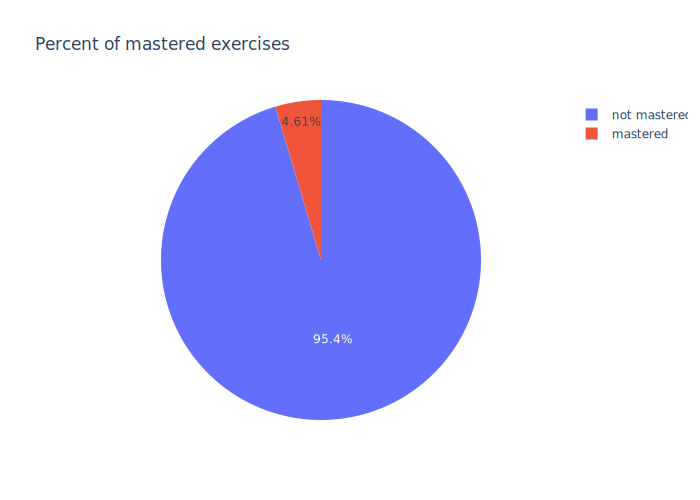

In [17]:
fig = px.pie(
    ds,
    names = ['mastered','not mastered'],
    values = 'percent',
    title = 'Percent of mastered exercises',
)

fig.show('svg')

In [18]:
ds = data['correct'].value_counts().reset_index().compute()
ds.columns = [
    'correct',
    'percent'
]
ds['percent'] /= total_count
ds = ds.sort_values(['percent'])

In [19]:
ds

,correct,percent
1,False,0.172126
0,True,0.827874


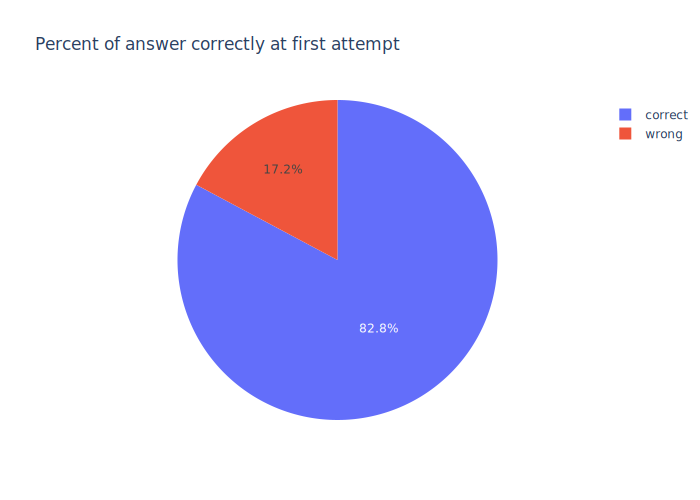

In [20]:
fig = px.pie(
    ds,
    names = ['wrong','correct'],
    values = 'percent',
    title = 'Percent of answer correctly at first attempt',
)
fig.show('svg')

#### junyi_ProblemLog_for_PSLC.txt
The tab delimited format used in PSLC datashop, please refer to their document ( https://pslcdatashop.web.cmu.edu/help?page=importFormatTd )
The size of the text file is too large (9.1 GB) to analyze using tools of websites, so we compress the text file and put it as an extra file of the dataset. We also upload a small subset of data into the website for the illustration purpose. Note that there are some assumptions when converting the data into this format, please read the description of our dataset for more details.

In [22]:
path = "./junyi/junyi_ProblemLog_for_PSLC.txt"
data = dd.read_csv(path, sep='\t',encoding = "utf-8")
pd.set_option('display.max_columns', 2000)
data.head()

,Anon Student Id,Session Id,Time,Student Response Type,Tutor Response Type,Level (Unit),Level (Section),Problem Name,Problem Start Time,Step Name,Outcome,Condition Name,Condition Type,Selection,Action,Input,KC (Exercise),KC (Topic),KC (Area),CF (points_earned),CF (earned_proficiency)
0,12884,148691,1420714809324,ATTEMPT,RESULT,telling-time,time_terminology,time_terminology--analog_word,1420714806324,time_terminology--analog_word,INCORRECT,Choose_Exercise,NaN,NaN,NaN,NaN,time_terminology,telling-time,arithmetic,0,0
1,12884,148691,1420714810324,ATTEMPT,RESULT,telling-time,time_terminology,time_terminology--analog_word,1420714809324,time_terminology--analog_word,INCORRECT,Choose_Exercise,NaN,NaN,NaN,NaN,time_terminology,telling-time,arithmetic,0,0
2,239464,93497,1403098400837,ATTEMPT,RESULT,multiplication-division,multiplication_1,multiplication_1--0,1403098398837,multiplication_1--0,CORRECT,Choose_Exercise,NaN,NaN,NaN,NaN,multiplication_1,multiplication-division,arithmetic,14,0
3,147359,145156,1418890695540,ATTEMPT,RESULT,decimals,adding_decimals_0.5,adding_decimals_0.5--0,1418890679540,adding_decimals_0.5--0,CORRECT,Choose_Exercise,NaN,NaN,NaN,NaN,adding_decimals_0.5,decimals,arithmetic,75,0
4,158155,105559,1400469444264,ATTEMPT,RESULT,multiplication-division,multiplication_1,multiplication_1--0,1400469442264,multiplication_1--0,CORRECT,Choose_Exercise,NaN,NaN,NaN,NaN,multiplication_1,multiplication-division,arithmetic,75,0


### Questions and Collaboration:
	1. If you have any question to this dataset, please e-mail to hschang@cs.umass.edu.
	2. If you have intention to acquire more data which fit your research purpose, please contact Junyi Academy directly for discussing the further cooperation opportunites by emailing to support@junyiacademy.org


### Note:
	1. The dataset we used in our paper (Modeling Exercise Relationships in E-Learning: A Unified Approach) is extracted from Junyi Academy on July 2014, and this dataset is extracted on Jan 2015. After applying our method on the new dataset, we got similar observation with that in our paper, even though this dataset contains more users and exercises. 
	2. After uncompress the original problem log and problem log using PLSC format, the text files will take around 2.6 GB and 9.1 GB respectively. Please prepare enough space in your disk.

### Annotaion:
1. PSLC数据集是对original数据集做了处理以后生成的数据，拆分的字段为time_taken_attempts，因此PSLC数据集的条目数比original的多

### Analysis

In [23]:
len(data)

39462201

#### 每个用户的session数

In [24]:
ds=data.groupby('Anon Student Id').agg({'Session Id':'count'}).describe().compute()

In [25]:
ds

,Session Id
count,247547.000000
mean,159.412964
std,598.876158
min,1.000000
25%,7.000000
50%,19.000000
75%,82.000000
max,55984.000000


In [26]:
data1=data.sample(frac=0.01).compute()

In [27]:
# 每个session对应的练习次数、知识点数(1%抽样)
nunique = dd.Aggregation(
    name="nunique",
    chunk=lambda s: s.apply(lambda x: list(set(x))),
    agg=lambda s0: s0.obj.groupby(level=list(range(s0.obj.index.nlevels))).sum(),
    finalize=lambda s1: s1.apply(lambda final: len(set(final))),
)
ds = data1.groupby('Session Id').agg({'KC (Exercise)':'nunique', 'KC (Topic)':'nunique','Time':lambda x: x.max()-x.min()})
ds.describe()

,KC (Exercise),KC (Topic),Time
count,164015.000000,164015.000000,1.640150e+05
mean,1.994543,1.564345,5.521162e+08
std,2.457822,1.288020,2.618666e+09
min,1.000000,1.000000,0.000000e+00
25%,1.000000,1.000000,0.000000e+00
50%,1.000000,1.000000,0.000000e+00
75%,2.000000,2.000000,1.515309e+06
max,121.000000,35.000000,6.488305e+10
